In [57]:
!pip install eli5 
!pip install pdpbox==0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

Dataset Description<br>
store_sales(in millions) - 각 매장에서 생성된 총 매출액(백만 달러).<br>
unit_sales(in millions) - 매장에서 판매된 상품의 수, 백만 개 단위.<br>
Total_children - 가정에 거주하는 어린이 총 수, 가정 내 또는 독립적으로 거주하는 경우 모두 포함.<br>
avg_cars_at home(approx) - 해당 지역의 가구가 소유한 평균 차량 수. <br>
Num_children_at_home - 가정 내에 거주하는 아이의 수.<br>
Gross_weight - 판매되는 제품의 총 중량, 포장재 포함.<br>
Recyclable_package - 식품 제품이 재활용 가능한 포장재에 포장되었는지 여부를 나타냅니다.<br>
Low_fat - 식품 제품이 저지방인지 여부를 나타냅니다.<br>
Units_per_case - 제품의 케이스 당 단위 수.<br>
Store_sqft - 매장의 총 면적(제곱 피트).<br>
Coffee_bar - 매장에 커피 바가 있는지 여부를 나타냅니다.0<br>
Video_store - 매장에 비디오 스토어 또는 게임 섹션이 있는지 여부를 나타냅니다.<br>
Salad_bar - 매장에 샐러드 바가 있는지 여부를 나타냅니다.<br>
Prepared_food - 매장에서 조리된 식품이 있는지 여부를 나타냅니다.<br>
Florist -매장에 꽃집이 있는지 여부를 나타냅니다.<br>
Cost - 고객 확보 비용<br>

In [59]:
# 훈련 데이터셋 불러오기 
df = pd.read_csv("/content/train.csv")

In [60]:
# 형태 확인 
df.shape

(360336, 17)

In [61]:
df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [62]:
df.tail()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
360331,360331,7.60,4.0,5.0,5.0,3.0,13.5,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0,0.0,133.42
360332,360332,14.44,4.0,4.0,0.0,4.0,18.8,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0,0.0,81.85
360333,360333,10.74,3.0,0.0,0.0,2.0,11.3,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0,1.0,87.07
360334,360334,11.04,3.0,1.0,0.0,3.0,10.2,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0,1.0,146.72
360335,360335,5.30,2.0,2.0,0.0,2.0,10.8,0.0,0.0,21.0,33858.0,1.0,0.0,1.0,1.0,1.0,122.47


In [63]:
# 데이터 셋에서 id 컬럼 drop 
df.drop(columns='id',axis=1,inplace=True)

In [64]:
# 데이터세트 통계 및 결측치 확인 
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ

In [65]:
# df
summary('df',df)

df shape: (360336, 16)


,dtypes,null,unique,min,median,max,mean,std
store_sales(in millions),float64,0,1044,0.51,5.78,22.92,6.337376,3.307980
unit_sales(in millions),float64,0,6,1.00,3.00,6.00,3.043881,0.784676
total_children,float64,0,6,0.00,2.00,5.00,2.456482,1.488992
num_children_at_home,float64,0,6,0.00,0.00,5.00,0.689390,1.214732
avg_cars_at home(approx).1,float64,0,5,0.00,2.00,4.00,2.203813,1.084293
gross_weight,float64,0,384,6.00,13.60,21.90,13.822071,4.614792
recyclable_package,float64,0,2,0.00,1.00,1.00,0.568086,0.495343
low_fat,float64,0,2,0.00,0.00,1.00,0.327797,0.469411
units_per_case,float64,0,36,1.00,20.00,36.00,18.972706,10.212912
store_sqft,float64,0,20,20319.00,27694.00,39696.00,28180.333442,5968.874074


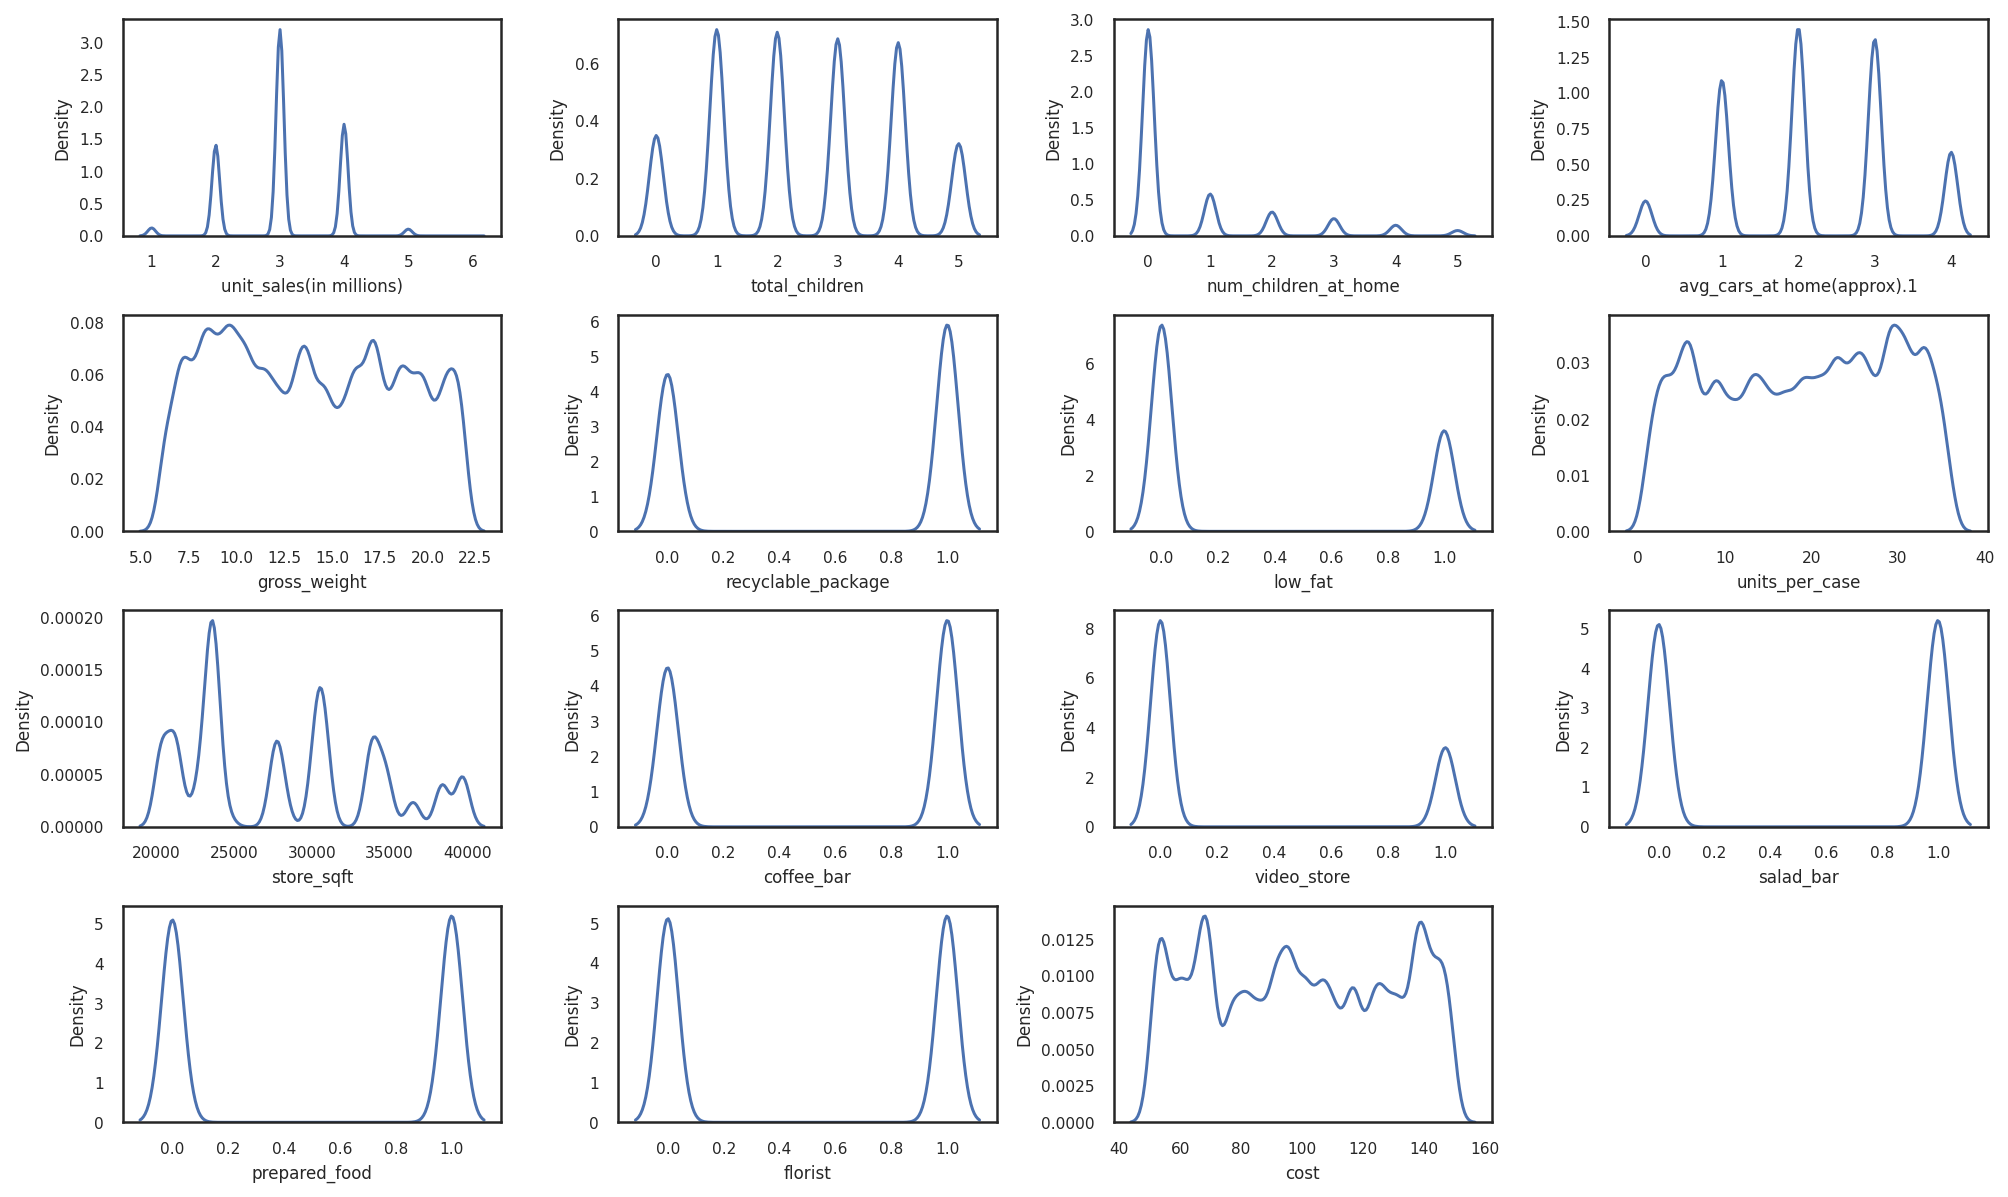

In [66]:
plt.figure(figsize=(14,10))
for i in range(1, len(df.columns)):
    plt.subplot(5,4,i)
    sns.kdeplot(x=df[df.columns[i]], label='Full Dataset')
    plt.tight_layout()

In [67]:
# 1. 연속형변수  : "store_sales(in millions)", "gross_weight", "units_per_case", "store_sqft"
# 2. 이진변수 : "recyclable_package", "low_fat", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist"
# 3. 범주형변수 : "unit_sales(in millions)", "total_children", "num_children_at_home", "avg_cars_at home(approx).1"

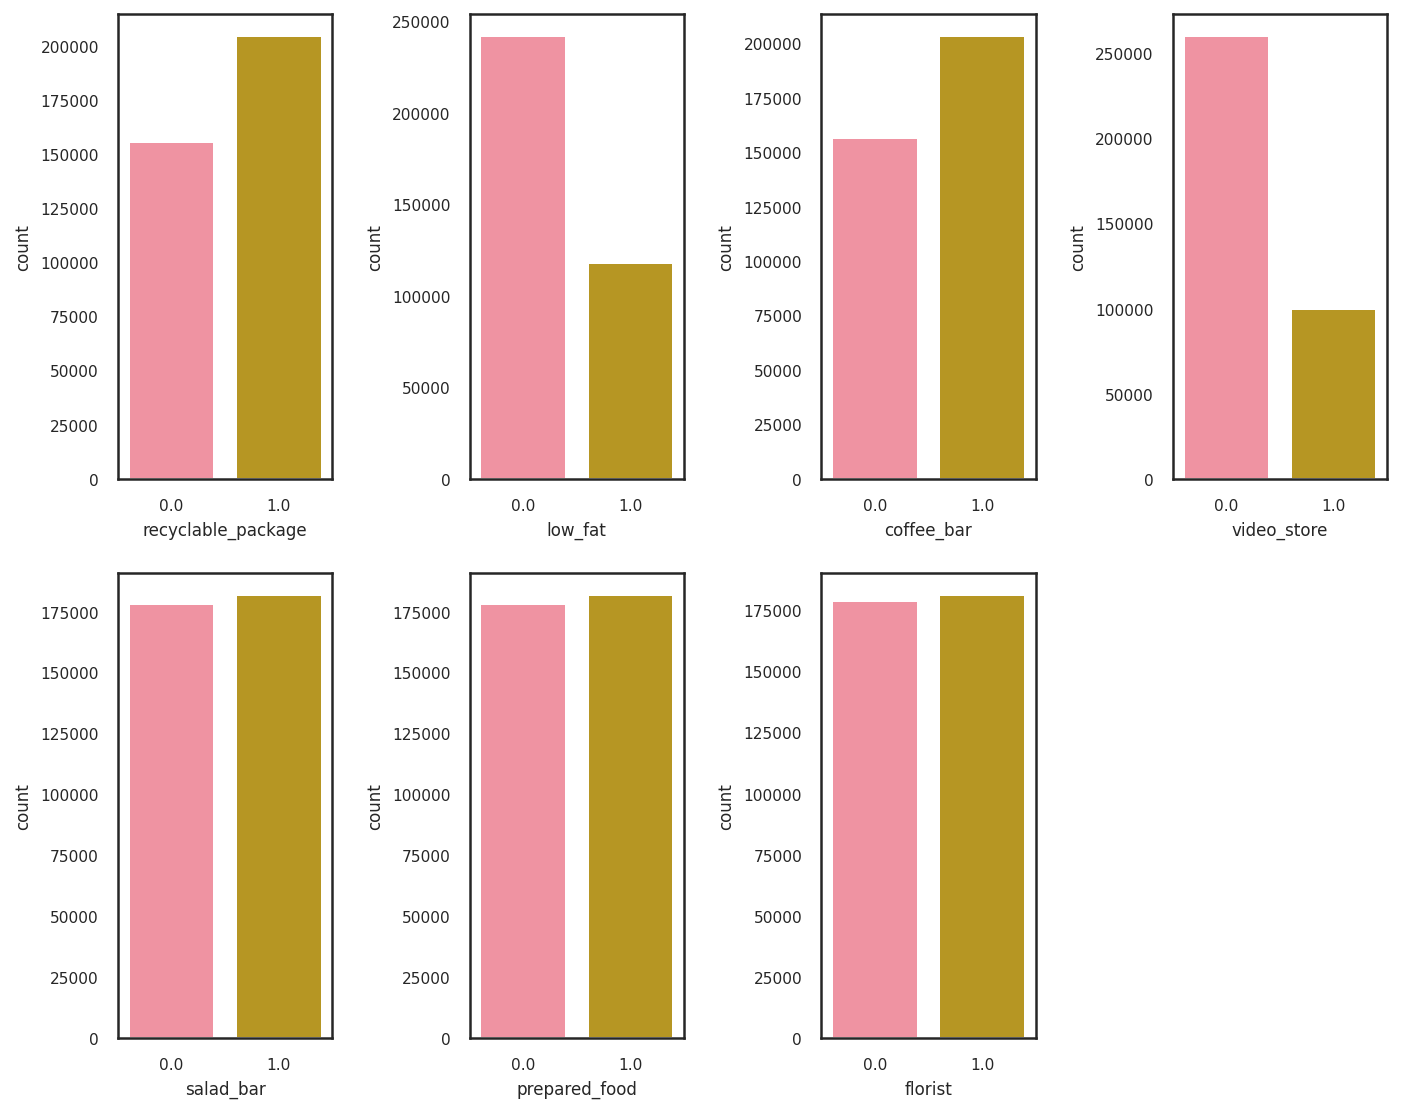

In [68]:
Continuous = ["store_sales(in millions)", "gross_weight", "units_per_case", "store_sqft"]
binary = ["recyclable_package", "low_fat", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist"]
categorical = ["unit_sales(in millions)", "total_children", "num_children_at_home", "avg_cars_at home(approx).1"]

colors = sns.husl_palette(n_colors=6, s=1.0, l=0.7)
fig = plt.figure(figsize=(10,8))
for i, cat_feature in enumerate(binary):
    ax = plt.subplot(2, 4, i+1)
    sns.countplot(x=cat_feature, data=df, palette=colors, ax=ax)
fig.tight_layout(pad=2)

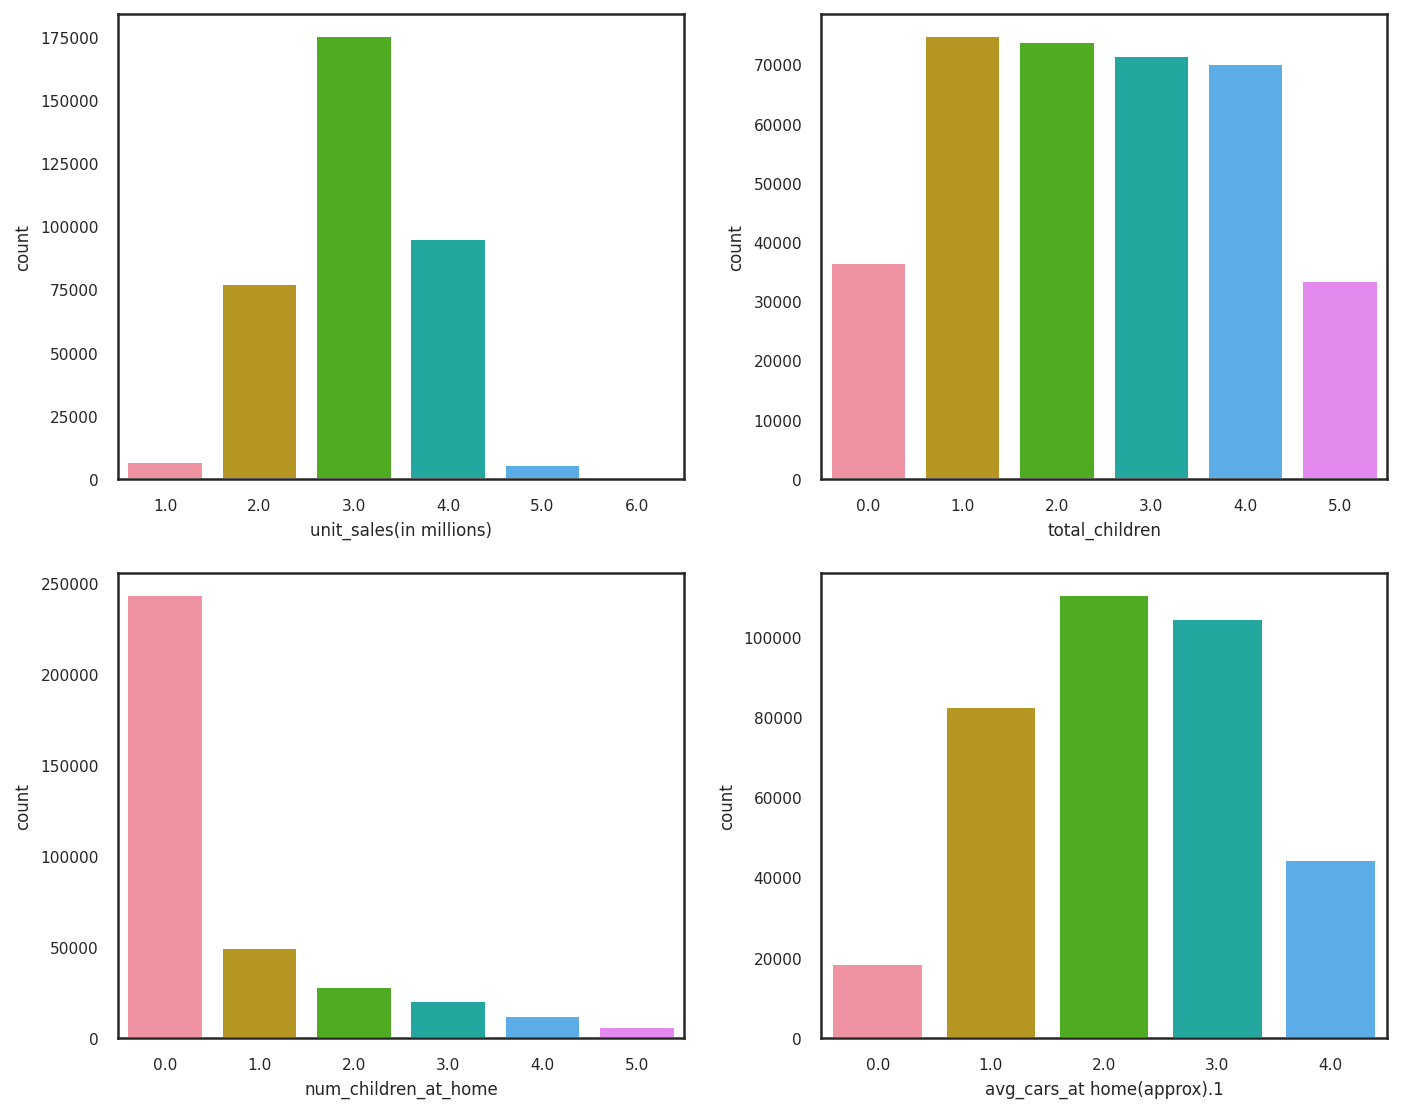

In [69]:
colors = sns.husl_palette(n_colors=6, s=1.0, l=0.7)
fig = plt.figure(figsize=(10,8))
for i, cat_feature in enumerate(categorical):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(x=cat_feature, data=df, palette=colors, ax=ax)
fig.tight_layout(pad=2)

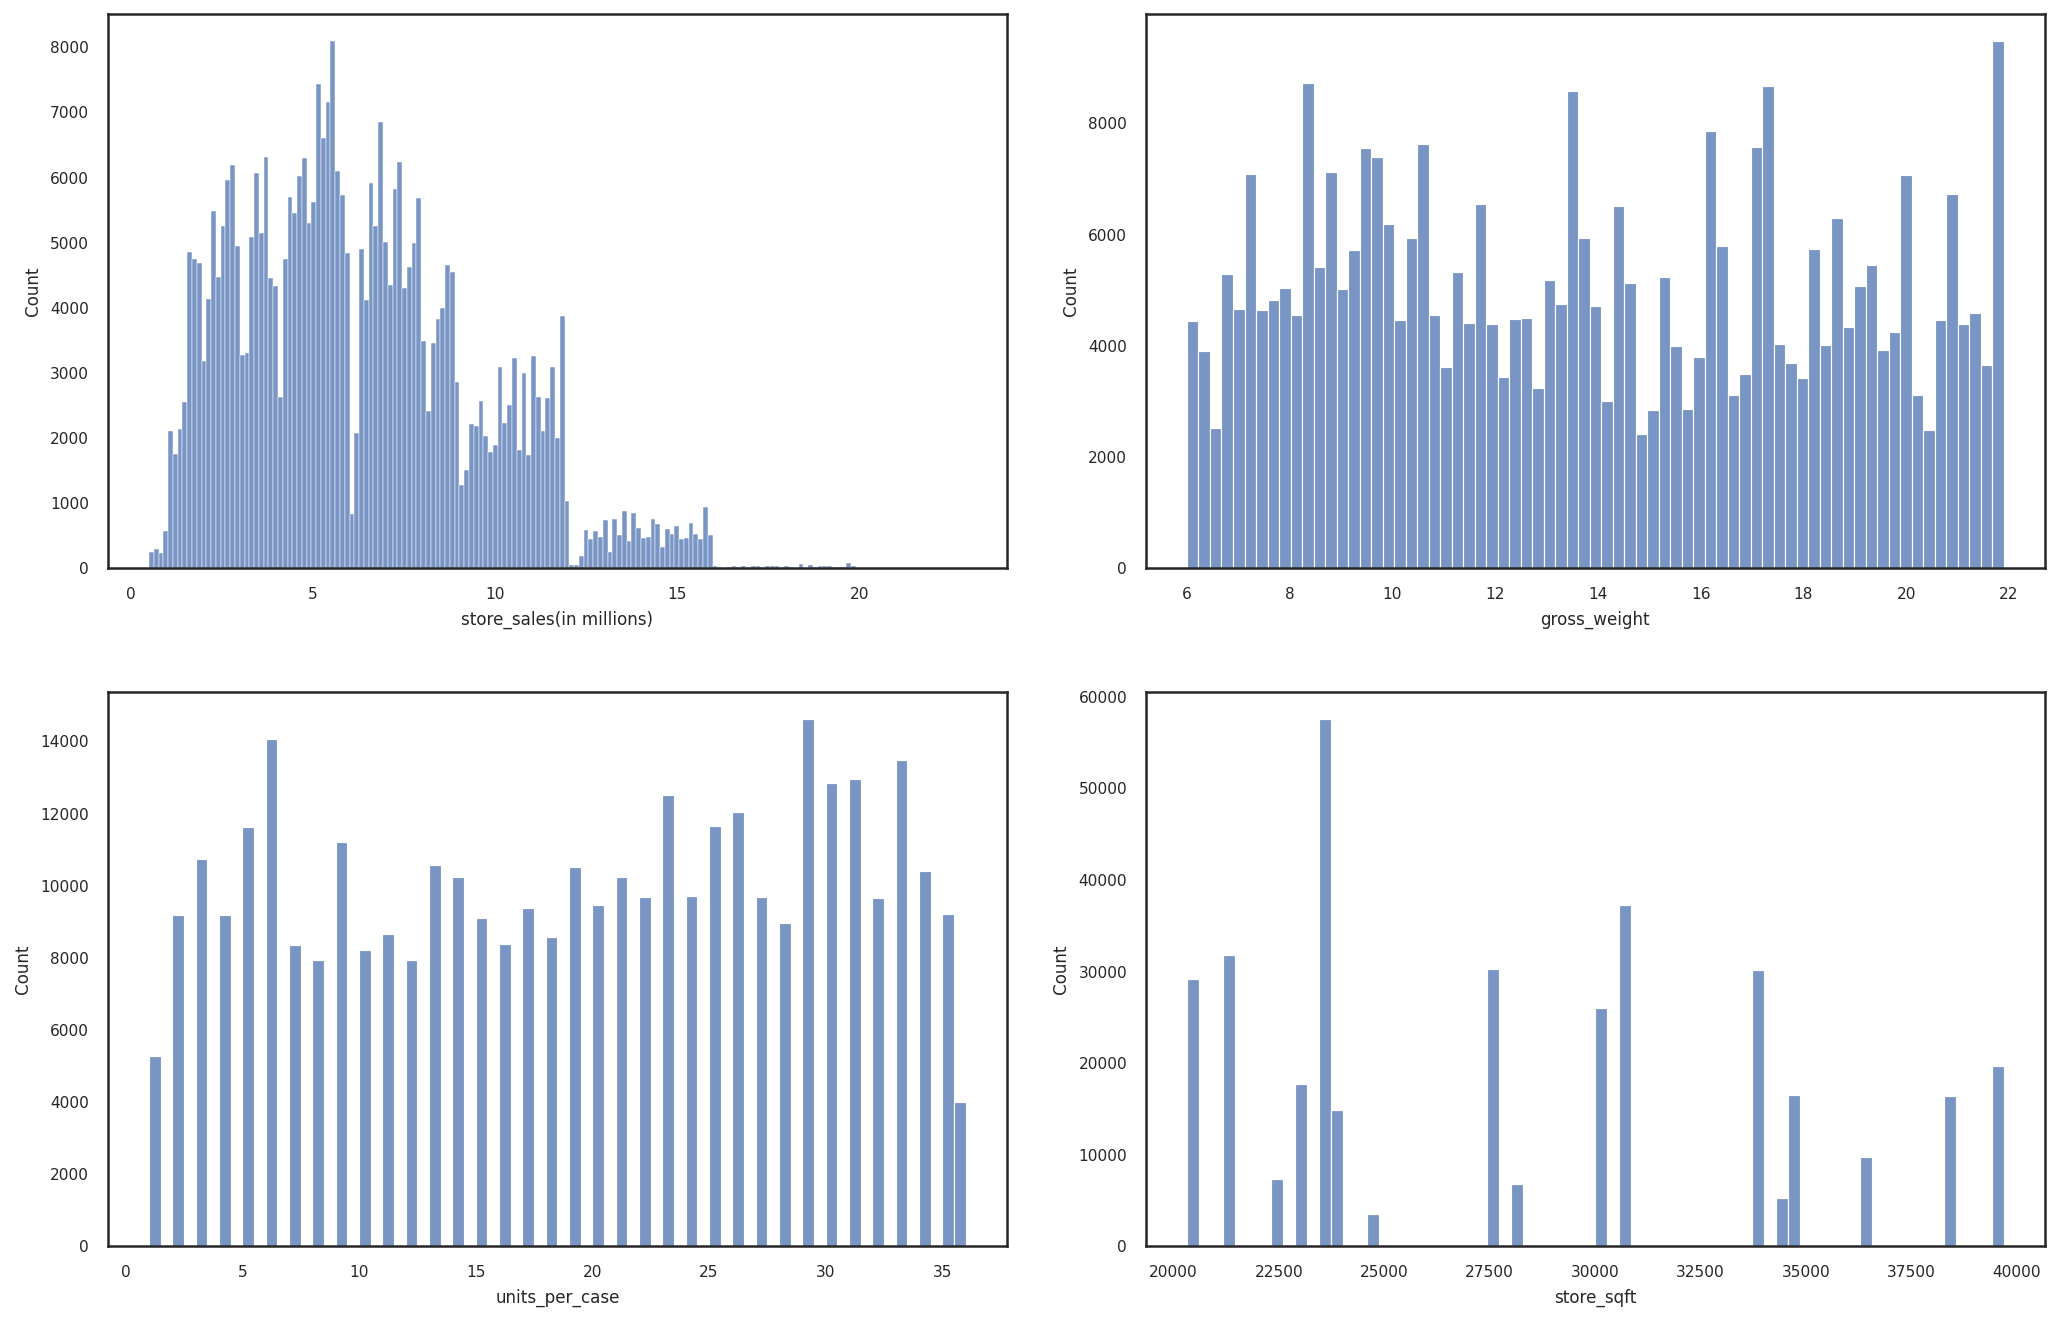

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.tight_layout(pad=5)


for i, num_feature in enumerate(Continuous):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(x=num_feature, data=df, ax=ax)

<Axes: xlabel='cost', ylabel='Count'>

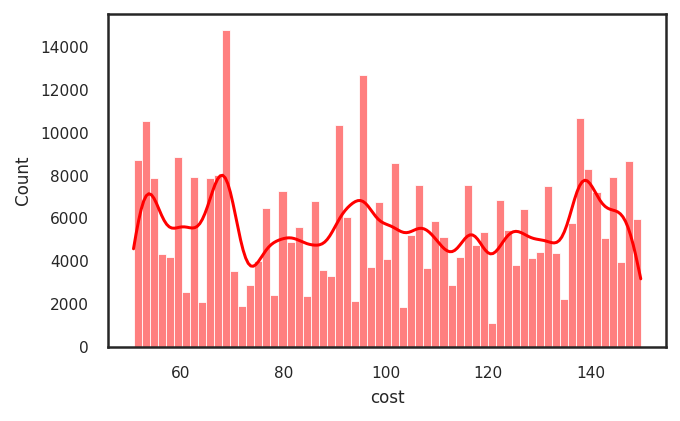

In [71]:
fig = plt.figure(figsize=(5,3))
sns.histplot(data=df, x="cost", kde=True, color='red', alpha=0.5)

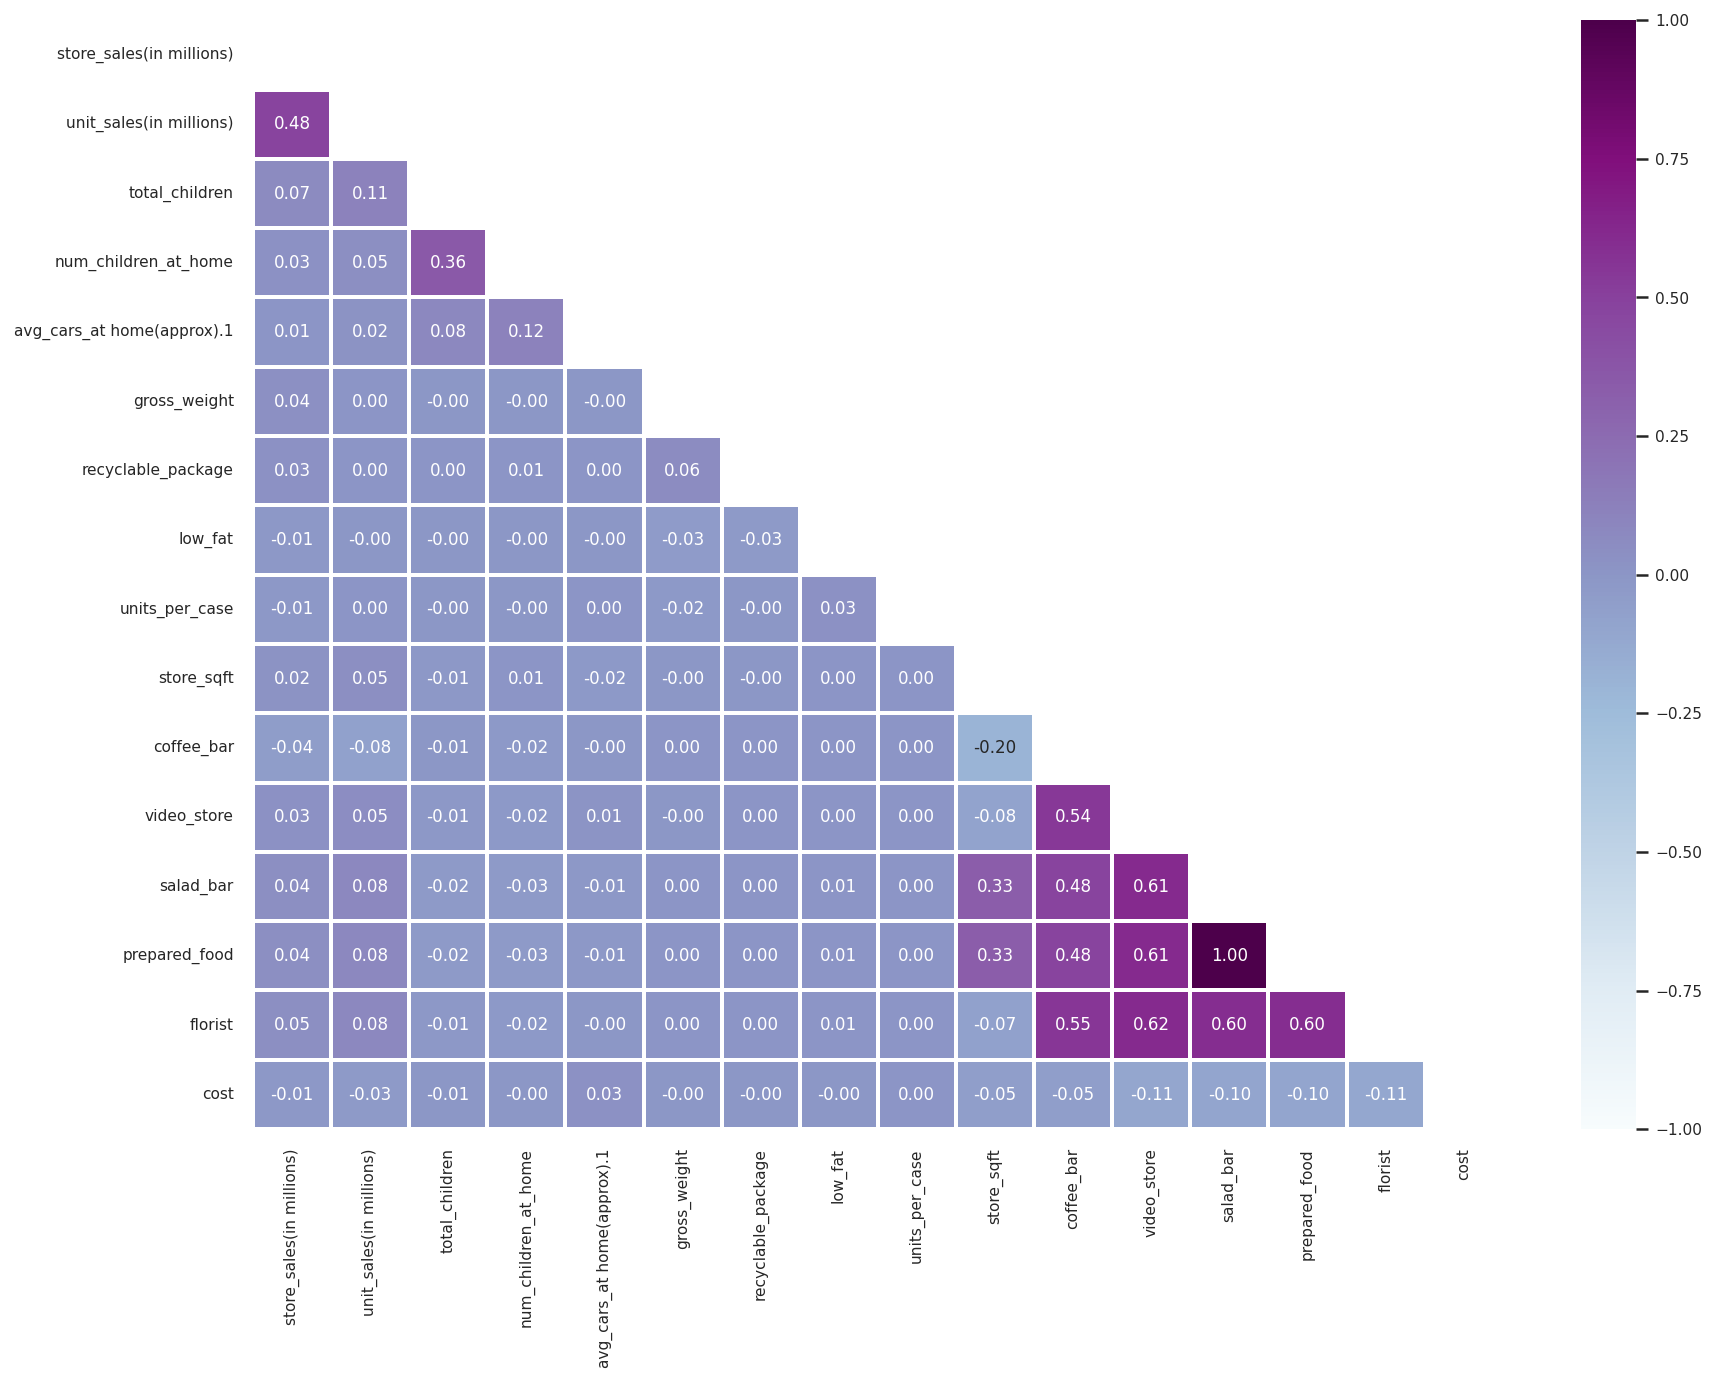

In [72]:
plt.figure(figsize=(14,10))

corr = df.corr()  

sns.set_theme(style='white',font_scale=0.7)
mask=np.zeros_like(df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr,
            cmap="BuPu",
            linewidths=2,
            mask=mask,
            vmin=-1,
            vmax=1,
            annot=True,
            fmt=".2f")

plt.show()

In [73]:
# "Total_children" 컬럼은 총 자녀의 수(다른 가족 구성원의 자녀도 포함)를 나타내고 있지만, "num_children_at_home" 컬럼은 현재 가정에서 거주 중인 자녀의 수를 나타냄. 
# 비율로 표현할 것 
df['children_ratio'] = df['num_children_at_home'] / df['total_children']
# 0 / 0 은 Nan 값으로 처리가 되므로 결측치를 0으로 채워줌 
df['children_ratio'].fillna(0,inplace=True)
df.drop(columns=['num_children_at_home','total_children'],axis=1,inplace=True)

In [74]:
# target으로 선정 할 Cost가 다른 특성들과 상관관계가 없음  
# salad_bar와 prepared_food 사이의 완벽한 상관관계를 이루고 있으므로 특성 하나 삭제
df.drop(columns=['prepared_food'],axis=1,inplace=True)

In [75]:
df[['coffee_bar', 'video_store', 'low_fat', 'salad_bar', 'florist']] = df[['coffee_bar', 'video_store', 'low_fat', 'salad_bar', 'florist']].astype(int)

In [76]:
# coffee_bar, video_store, salad_bar, florist 등을 묶어 시설 컬럼을 생성 한다. 
df['facilities'] = df['coffee_bar'] + df['video_store'] + df['salad_bar'] + df['florist']

In [77]:
df.sample(5)

,store_sales(in millions),unit_sales(in millions),avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist,cost,children_ratio,facilities
116471,5.54,2.0,0.0,19.90,1.0,1,3.0,21215.0,1,0,0,0,69.63,0.0,1
320917,3.60,2.0,3.0,8.22,0.0,1,12.0,20319.0,0,0,0,0,53.01,1.0,0
89493,4.80,3.0,2.0,19.80,1.0,0,29.0,23112.0,1,1,1,1,122.77,0.0,4
347320,11.84,4.0,2.0,21.40,1.0,0,23.0,21215.0,1,0,0,0,137.77,0.0,1
19311,7.95,3.0,1.0,9.92,0.0,0,29.0,30584.0,1,1,1,1,141.38,0.5,4


In [78]:
target = 'cost'
X=df.drop(target,axis=1)
y=df.loc[:,target]

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [98]:
X_train.shape,X_val.shape,X_test.shape

((230614, 14), (57654, 14), (72068, 14))

In [99]:
from sklearn.metrics import r2_score,mean_squared_log_error

In [100]:
from sklearn.preprocessing import  StandardScaler
# 수치형 변수만 스케일링
scaler = StandardScaler()
X_train[Continuous]=scaler.fit_transform(X_train[Continuous])
X_val[Continuous]=scaler.transform(X_val[Continuous])
X_test[Continuous]=scaler.transform(X_test[Continuous])

In [101]:
RMSLE=[]
def rmsle(y, y_pred):
    return mean_squared_log_error(y, y_pred, squared=False)

In [102]:
from sklearn.metrics import r2_score
R2=[]
def r2(y,y_pred):
  return r2_score(y,y_pred)

In [103]:
# 최빈값으로 기준 모델 설정 
base=y_train.mode()[0]
baseline=len(y_train)*[base]
RMSLE.append(rmsle(y_train,baseline))
R2.append(r2(y_train,baseline))
print(RMSLE)
print(R2)

[0.3242017771008932]
[-0.00543661173396881]


In [104]:
# linear Regression
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train,y_train)
y_val_pred = lr.predict(X_val)

RMSLE.append(rmsle(y_val,y_val_pred))
R2.append(r2(y_val,y_val_pred))

print(RMSLE)
print(R2)

[0.3242017771008932, 0.3166266973616666]
[-0.00543661173396881, 0.018443696924328123]


In [105]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_val_pred = ridge.predict(X_val)

RMSLE.append(rmsle(y_val,y_val_pred)) 
R2.append(r2(y_val,y_val_pred))
print(RMSLE)
print(R2)

[0.3242017771008932, 0.3166266973616666, 0.3166267033739306]
[-0.00543661173396881, 0.018443696924328123, 0.018443734815240753]


In [106]:
# Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_val_pred = lasso.predict(X_val)

RMSLE.append(rmsle(y_val,y_val_pred)) 
R2.append(r2(y_val,y_val_pred))
print(RMSLE)
print(R2)

[0.3242017771008932, 0.3166266973616666, 0.3166267033739306, 0.31674920229747905]
[-0.00543661173396881, 0.018443696924328123, 0.018443734815240753, 0.018227922732168]


In [107]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)

RMSLE.append(rmsle(y_val,y_val_pred)) 
R2.append(r2(y_val,y_val_pred))
print(RMSLE)
print(R2)

[0.3242017771008932, 0.3166266973616666, 0.3166267033739306, 0.31674920229747905, 0.3286680763838285]
[-0.00543661173396881, 0.018443696924328123, 0.018443734815240753, 0.018227922732168, -0.07883865345895003]


In [108]:
# xgboost model and feature importance
from xgboost import XGBRegressor,plot_importance
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_val_pred = xgb.predict(X_val)

RMSLE.append(rmsle(y_val,y_val_pred)) 
print(RMSLE)

[0.3242017771008932, 0.3166266973616666, 0.3166267033739306, 0.31674920229747905, 0.3286680763838285, 0.3074040384161824]


In [109]:
R2.append(r2(y_val,y_val_pred))
print(R2)

[-0.00543661173396881, 0.018443696924328123, 0.018443734815240753, 0.018227922732168, -0.07883865345895003, 0.07163982970958394]


In [110]:
# xgboost모델의 RMSLE값이 가장 적게 나오고 R2값도 1에 가장 가깝기 때문에  xgboost모델 pick

In [111]:
model = XGBRegressor(
    objective="reg:squaredlogerror",
    eval_metric='rmsle'
)

In [112]:
params = {
    "max_depth": [4, 5, 6],
    "n_estimators": [400, 500],
    "learning_rate": [0.01, 0.015]
}

In [114]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(
    model,
    params,
    cv=3,
    verbose=3
)
search.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=400;, score=-6.231 total time=  19.6s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=400;, score=-6.310 total time=  21.3s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=400;, score=-6.292 total time=  22.0s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=-3.718 total time=  24.5s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=-3.783 total time=  25.6s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=-3.767 total time=  28.5s
[CV 1/3] END learning_rate=0.01, max_depth=5, n_estimators=400;, score=-6.231 total time=  21.3s
[CV 2/3] END learning_rate=0.01, max_depth=5, n_estimators=400;, score=-6.310 total time=  19.5s
[CV 3/3] END learning_rate=0.01, max_depth=5, n_estimators=400;, score=-6.292 total time=  21.9s
[CV 1/3] END learning_rate=0.01, max_depth=5, n_estimators=500;, s

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmsle', feature_types=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=Non...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:squaredlogerror',
                                    predictor=None, ...),
             param_grid={'learning_rate': [0.01, 0.015], 'max_depth': [4, 5, 6],
                         'n_estimators': [400, 500]},
             verbose=3)

In [115]:
print("The best hyperparameters ",search.best_params_)

The best hyperparameters  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 500}


In [116]:
model = XGBRegressor(
    objective="reg:squaredlogerror",
    eval_metric='rmsle',
    learning_rate=search.best_params_["learning_rate"],
    max_depth=search.best_params_["max_depth"],
    n_estimators=search.best_params_["n_estimators"]
)

In [117]:
# model = XGBRegressor(
#     objective="reg:squaredlogerror",
#     eval_metric='rmsle',
#     learning_rate=0.015,
#     max_depth=4,
#     n_estimators=500
# )

In [118]:
model.fit(X_train,y_train)
y_val_predict=model.predict(X_val)

In [119]:
print(rmsle(y_val,y_val_predict))
print(r2(y_val,y_val_predict))

0.3428992961569496
-0.3143338838093963


In [120]:
#그리드 서치를 통해 얻은 rmsle값이 기본 하이퍼파라미터를 사용한 모델의 rmsle값보다 크기떄문에 기본 하이퍼파라미터를 사용한 모델로 test데이터를 학습

In [121]:
y_test_pred = xgb.predict(X_test)

In [122]:
print(rmsle(y_test,y_test_pred))
print(r2(y_test,y_test_pred))

0.3079338332584822
0.07464780058127607


In [123]:
from sklearn.inspection import permutation_importance

In [124]:
from eli5.sklearn import PermutationImportance
import eli5
permuter = PermutationImportance(xgb)
permuter.fit(X_test,y_test)
feature_names = X_test.columns.tolist()
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)

Weight,Feature
0.2666 ± 0.0032,store_sqft
0.2066 ± 0.0041,florist
0.0520 ± 0.0022,salad_bar
0.0390 ± 0.0007,coffee_bar
0.0311 ± 0.0012,facilities
0.0272 ± 0.0013,video_store
0.0248 ± 0.0019,avg_cars_at home(approx).1
0.0194 ± 0.0013,children_ratio
0.0057 ± 0.0011,unit_sales(in millions)
0.0045 ± 0.0010,store_sales(in millions)


Text(0.5, 1.0, 'Permutation Importance')

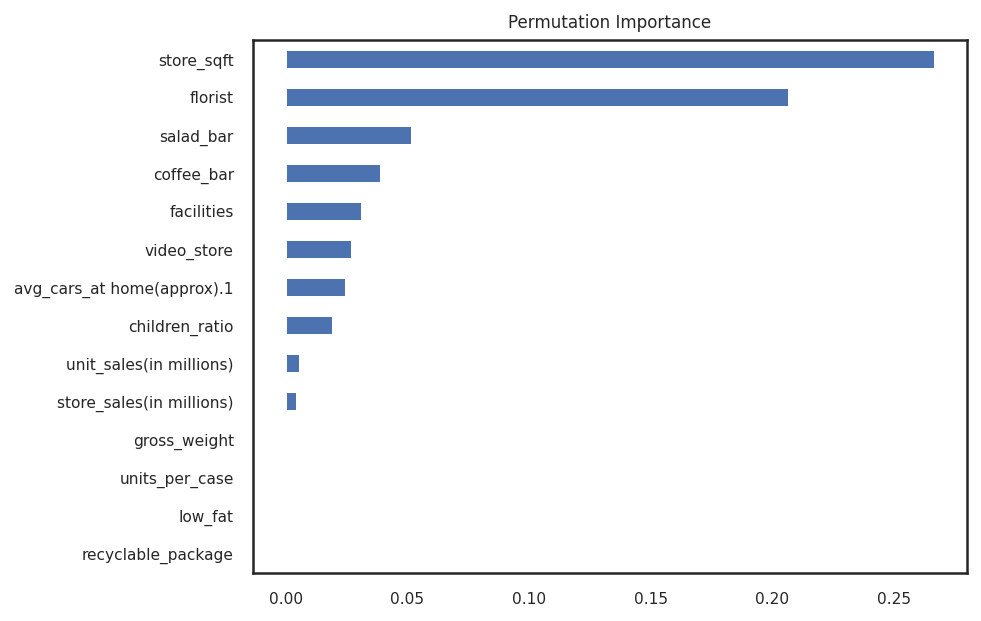

In [125]:
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

In [126]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 144

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='store_sales(in millions)'>})

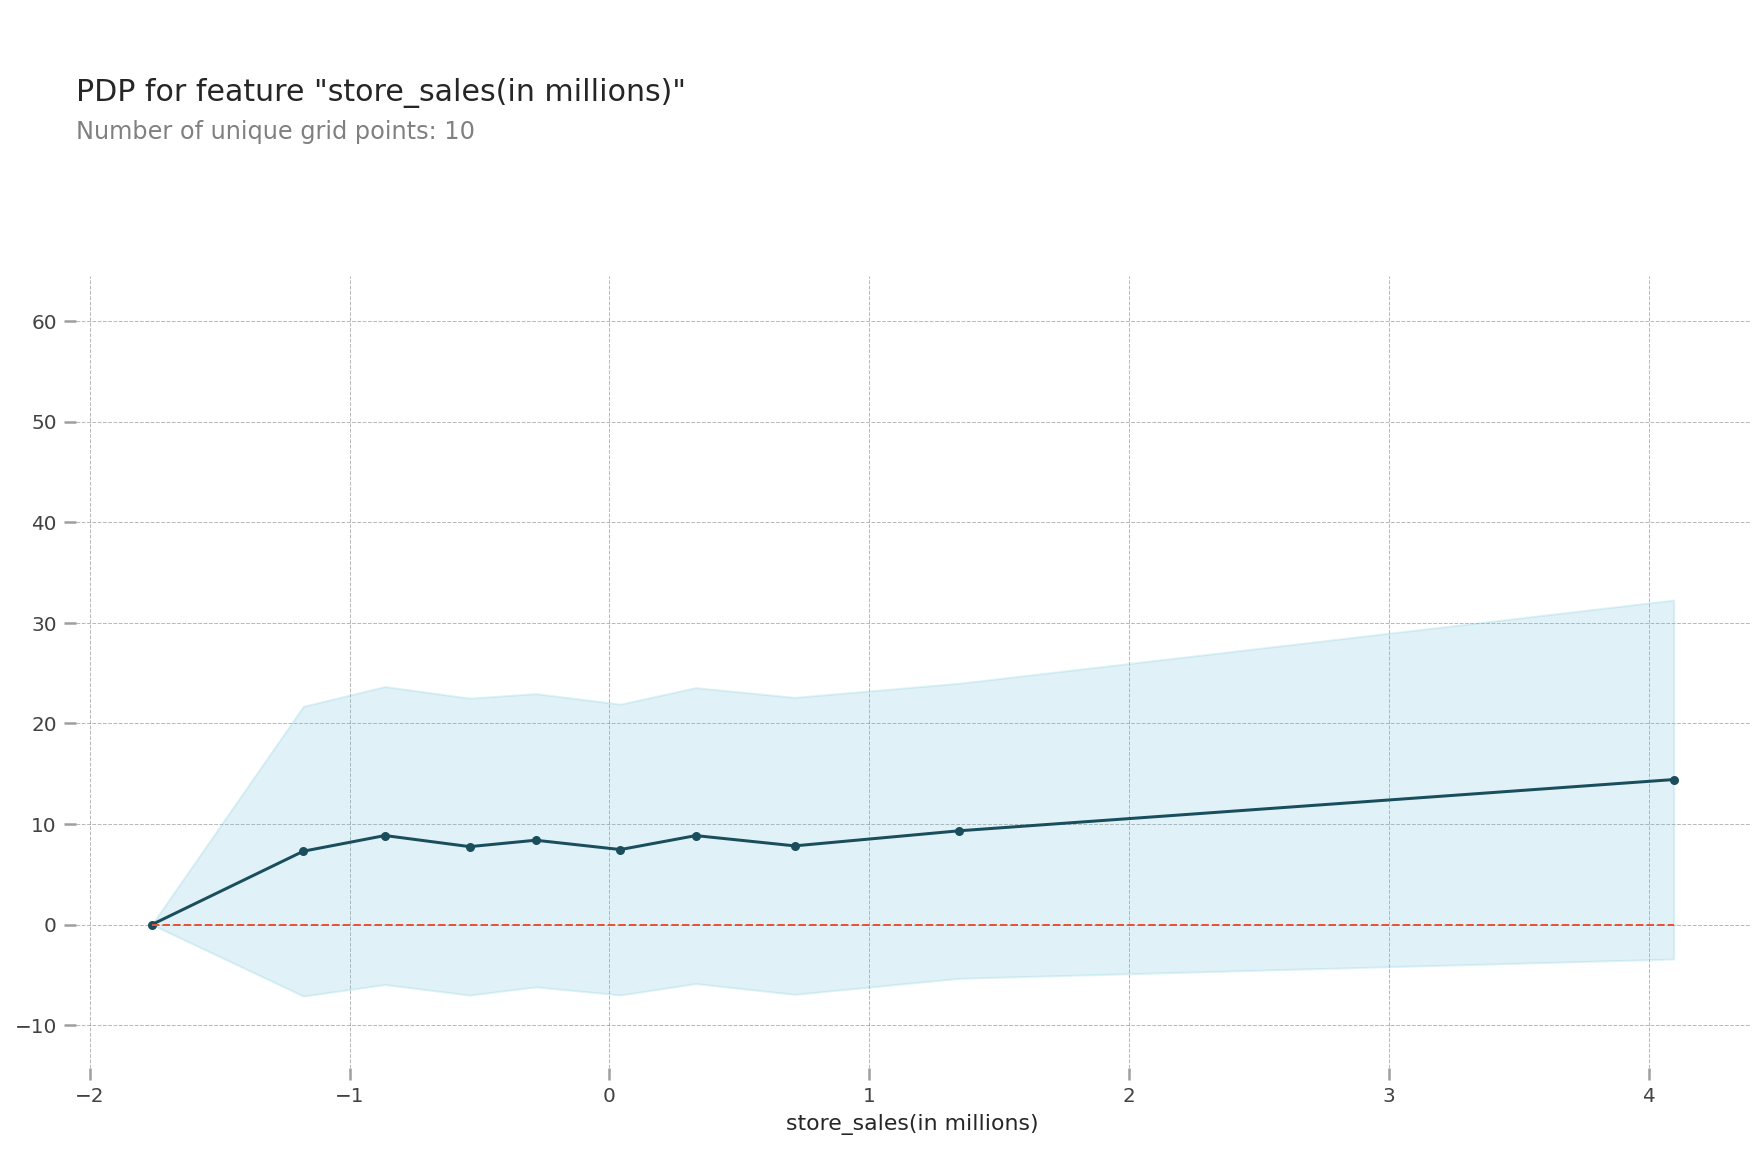

In [127]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = "store_sales(in millions)"

isolated = pdp_isolate(
    model=xgb,
    dataset=X_test,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='store_sqft'>})

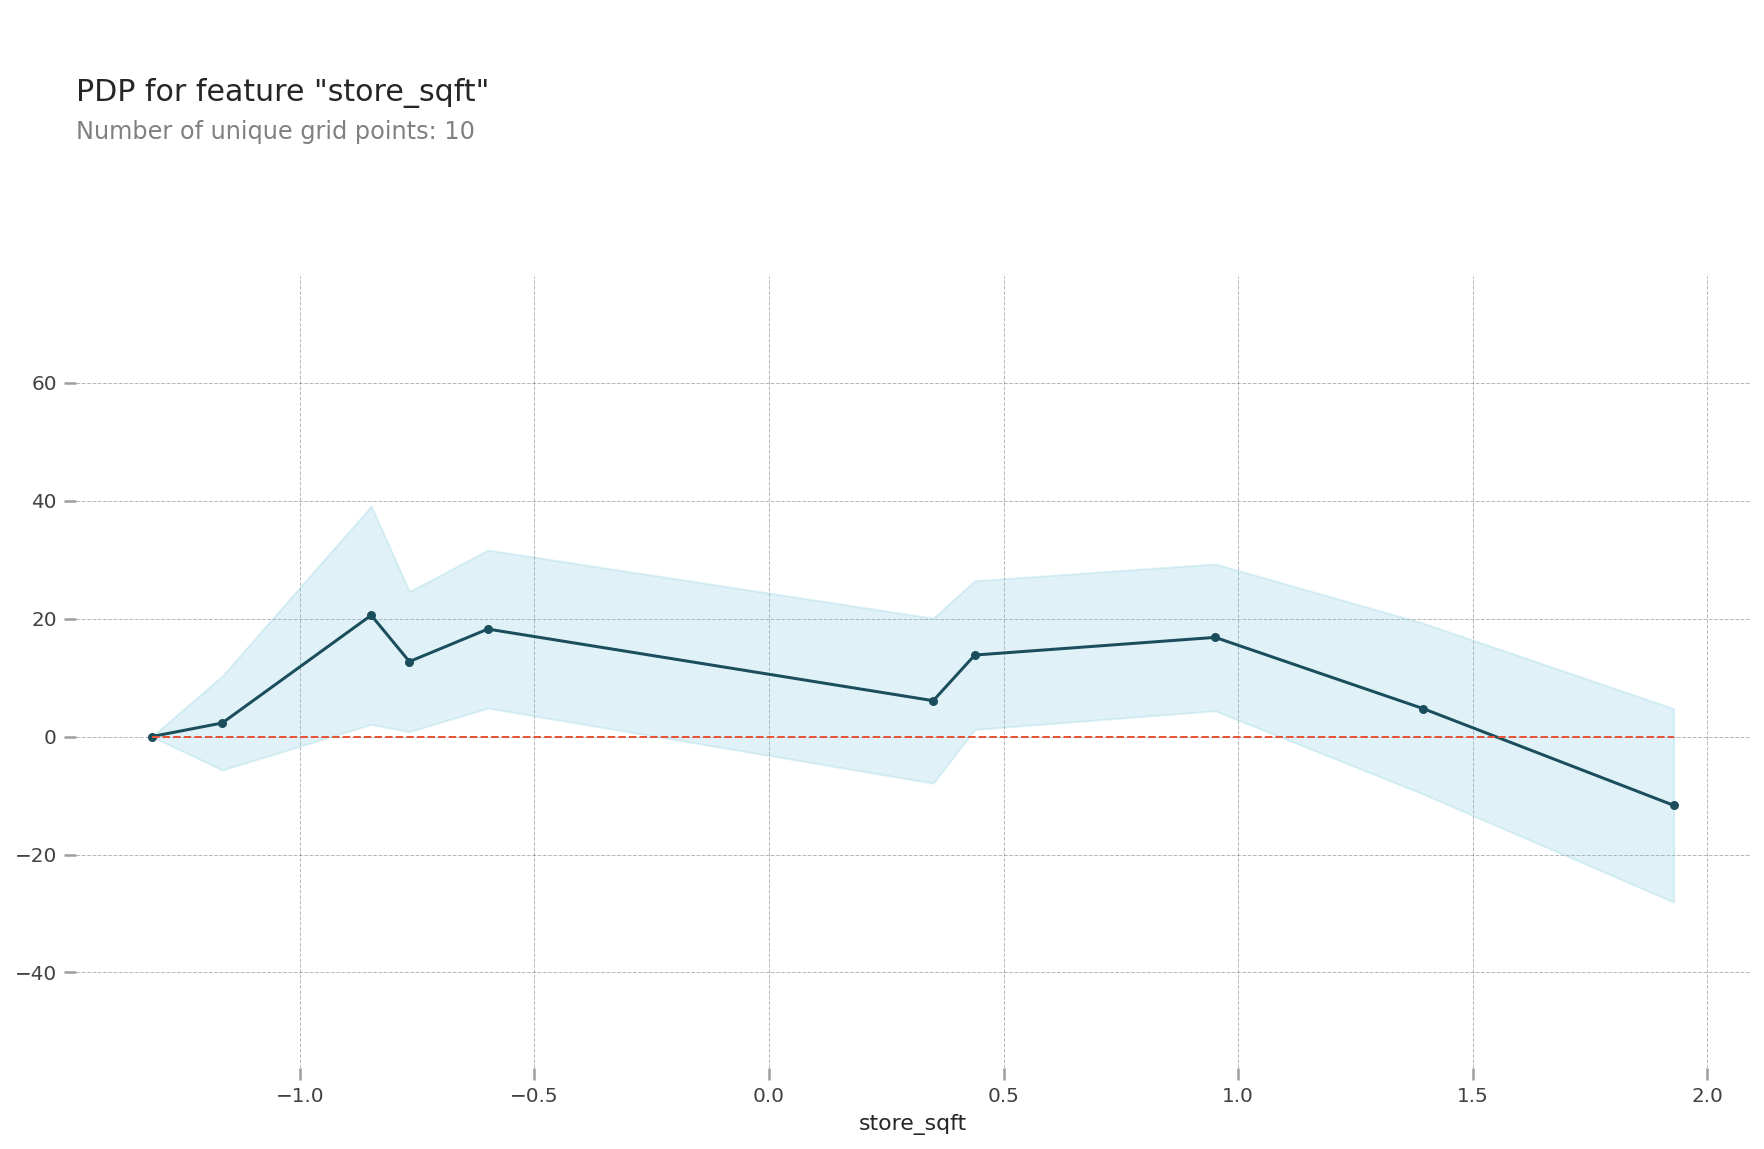

In [128]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = "store_sqft"

isolated = pdp_isolate(
    model=xgb,
    dataset=X_test,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <Axes: >, 'pdp_ax': <Axes: xlabel='facilities'>})

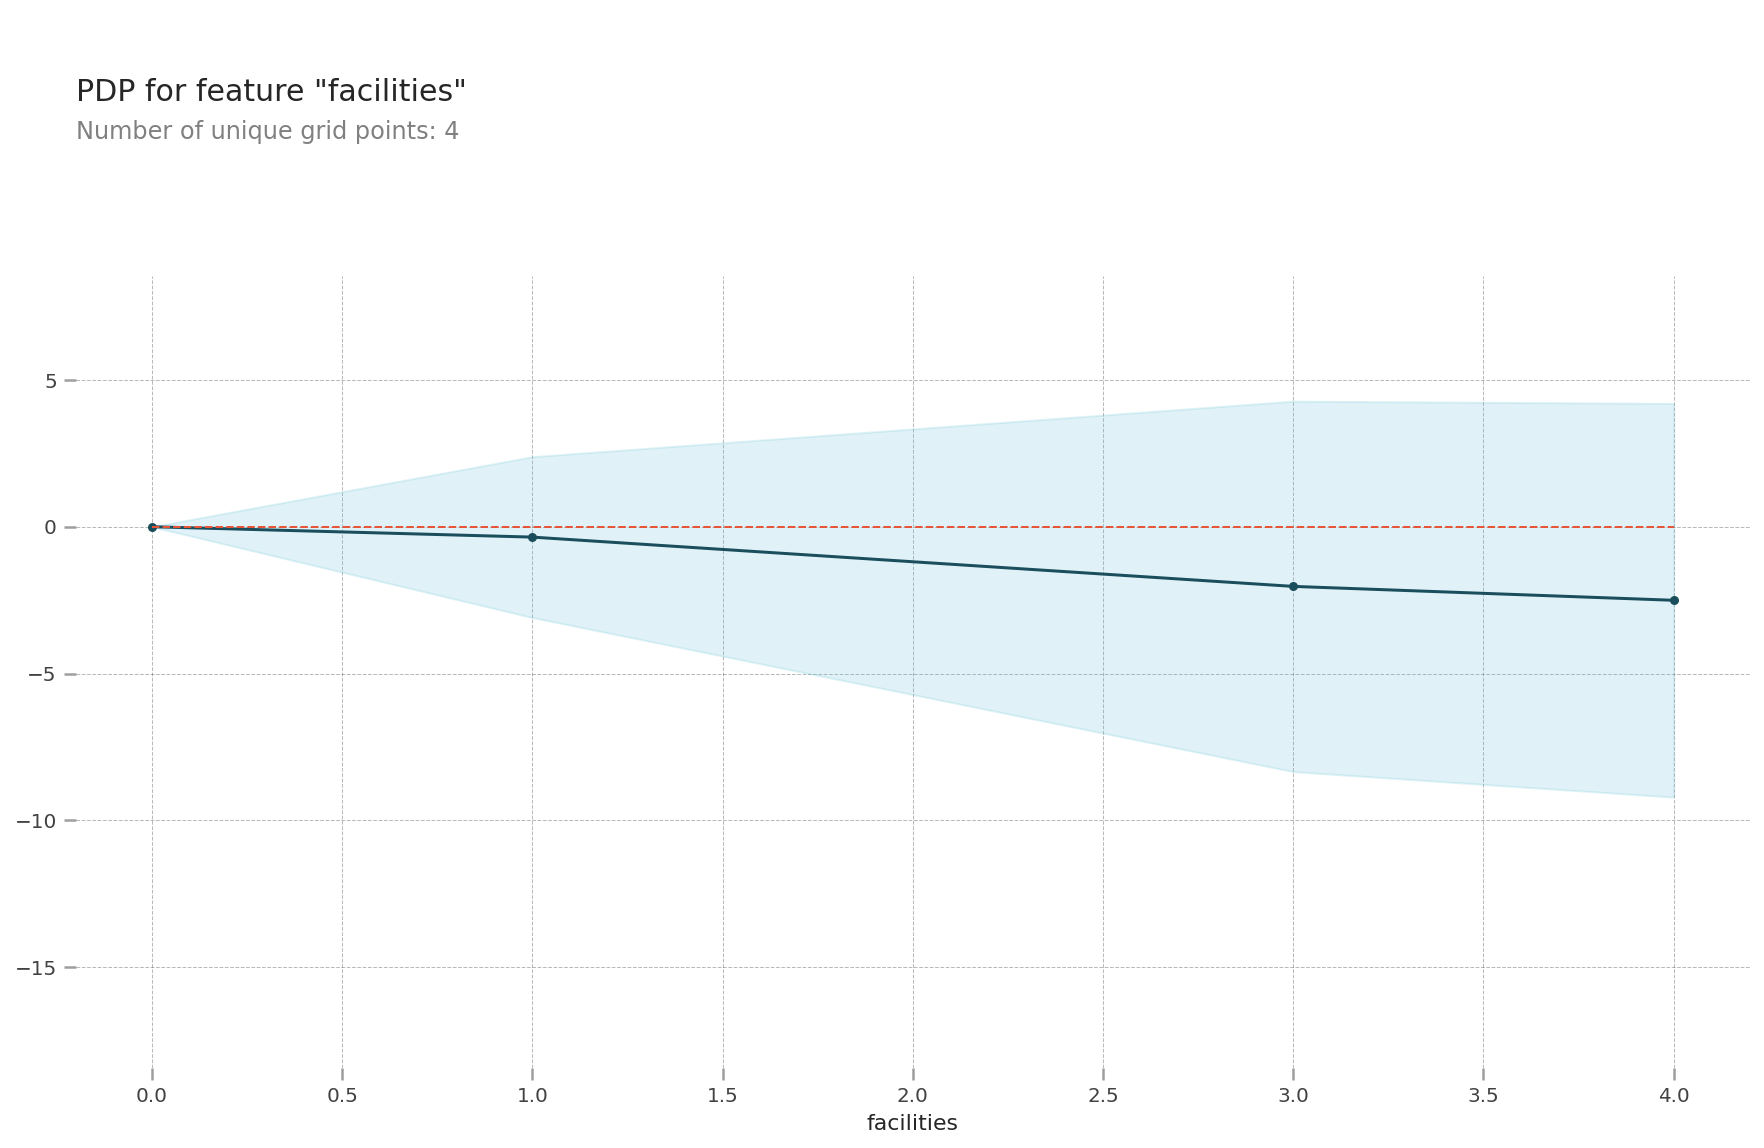

In [129]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = "facilities"

isolated = pdp_isolate(
    model=xgb,
    dataset=X_test,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

In [130]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

(<Figure size 1080x1368 with 3 Axes>,
 {'title_ax': <Axes: >,
  'pdp_inter_ax': <Axes: xlabel='store_sales(in millions)', ylabel='store_sqft'>})

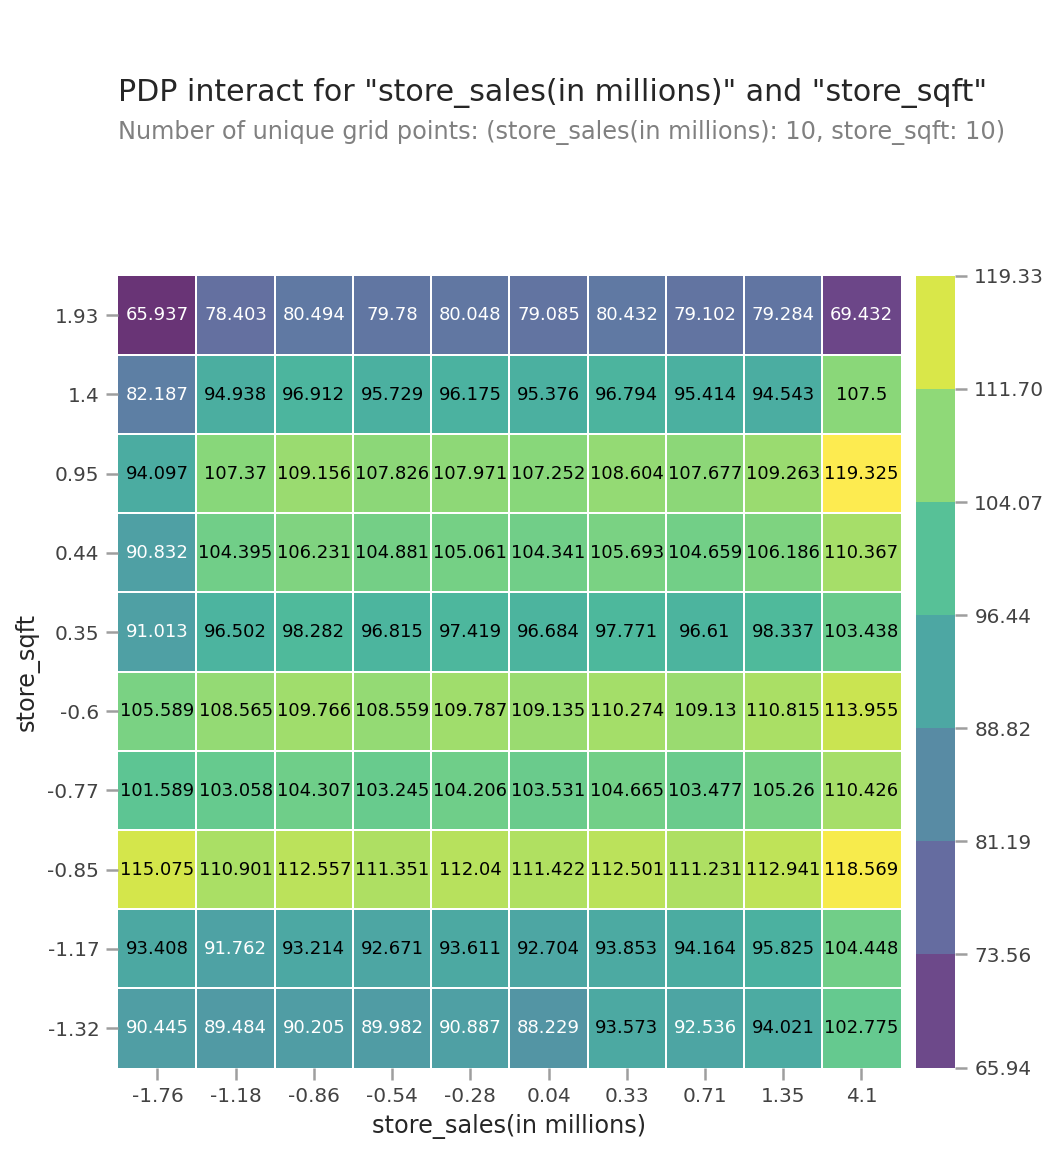

In [131]:
vars = ['store_sales(in millions)','store_sqft']

interaction = pdp_interact(xgb, dataset= X_test, model_features= list(X_test),
                            features=vars,
)
pdp_interact_plot(interaction, plot_type="grid", feature_names=vars)